In [1]:
from docplex.mp.model import Model
from docplex.util.environment import get_environment
from PMTK.sampling.preferences_sampler import *
from PMTK.pref.preferences import *
from PMTK.utility.utility_solver import *
from PMTK.sampling.subset_samplers import *
from PMTK.utility.model_solver import *
from PMTK.utility.subset_finder import *
from PMTK.sampling.gibbs import *
from tqdm import tqdm
import numpy as np
import pandas as pd
from PMTK.utility.candidate_iterator import *
from PMTK.sampling.gibbs import *

# Test on a pure visual example

In [2]:
mdl = Model("Test")
x = mdl.continuous_var(name = "x")
y = mdl.continuous_var(name = "y")
cst = []
c = mdl.add_constraint(y + x <= 5)
c = mdl.add_constraint(x >= 0)
c = mdl.add_constraint(x <= 3)
c = mdl.add_constraint(y >= 0)
mdl.vars = {"x":x, "y":y}

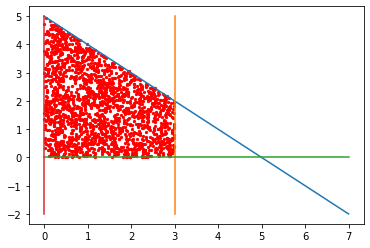

In [3]:
points = sample_innter_points(mdl, mdl.vars, n_points=2000)

X = np.arange(0, 8)
y =  -X + 5
plt.plot(X, y)
plt.plot(np.zeros(y.shape) + 3, np.linspace(y.min(), y.max(), y.shape[0]))
plt.plot(X, np.zeros(y.shape))
plt.plot(np.zeros(y.shape), y)

for c in points:
    plt.scatter(c[0], c[1], color = "red",s = 5)


# Test on a preferences-based example

In [4]:
n_items = 5
density = 0.2
items = np.arange(n_items)
theta = get_all_k_sets(items, 4)
prf = sample_preferences_from_order(items, density*(2**(n_items+1)), indifference_rate= 0.3)
prf

() > (0,) 
() > (3,) 
() > (0, 1, 2) 
() > (0, 1) 
() > (0, 1, 3, 4) 
(0,) > (3,) 
(0,) > (0, 1, 2) 
(0,) > (0, 1) 
(0,) > (0, 1, 3, 4) 
(3,) > (0, 1, 2) 
(3,) > (0, 1) 
(3,) > (0, 1, 3, 4) 
(0, 1, 2) > (0, 1) 
(0, 1, 2) > (0, 1, 3, 4) 
(0, 1) = (0, 1, 3, 4) 

In [13]:
ut, sb = sample_utilities(theta, prf)
rank_by_deg(prf.items, ut, list(sb), 3)

{(0, 2, 3): 0,
 (3,): 0,
 (0, 1, 3): 0,
 (0, 1, 2, 3, 4): 0,
 (0, 2, 4): 0,
 (1, 3): 1,
 (0, 1, 2, 4): 1,
 (0, 4): 1,
 (0, 2): 2,
 (0, 3): 2}

In [15]:
subsets = sample_subsets(items, n_subsets = 10)
e = entropy_matrix(subsets, ut, sb).sum(axis = 0)

In [22]:
np.argsort(e)

array([8, 2, 4, 9, 3, 6, 7, 1, 5, 0])